### Work division
#### The work for this notebook is done and compiled by
>#### AQ2.1 Nemish Murawat
>#### AQ2.2  Nemish Murawat
>#### AQ2.3 Nemish Murawat and Luca Mazzucco discussed the idea of approach. Nemish Murawat implemented and explained the discussed approach.
>#### AQ2.4 Nemish Murawat
>#### AQ2.5 Nemish Murawat


### Libraries Required

In [16]:
import matplotlib.pyplot as plt
import random
import time
from tqdm import tqdm as tq

### AQ2.1 The questions states that Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

#### - Each piece of the cut should have an integer length
#### - He should at least cut the ribbon once
#### - The multiplication of the length of all the pieces be the maximum possible


- Okay,now the 1st and 2nd part of the questions asks us to create a `recursive algorithm` that would have `exponential` running time. 
    - This gives us a hint that there terms which are being calculated again and again which is one of the major causes of exponential running time.
    - I follow this idea to create my algorithm
    
<div class="alert alert-block alert-warning">
<b> Idea of the Naive Implementation of the algorithm:
    
    
    1. So for a Length of rope n, for the first cut I can have a length of subrope varying from [1] to [n-1]. Hence my algorithm iterates over the all the possible choice of the length of the first subrope. Let's assume for iteration [ith], i cut a rope of length i.

    2. Now, for the other part of the rope in the [ith] iteration, my goal would be to cut in the other part of the rope of length [n-i] in the most optimal way to maximumize the product of the cuts. 
    
        2.1 To evaluate this, the approach would be the same as point first to evaluate over the choices of the the possible subcuts over the length [n-i].
        
    3. It will not be always the case that splitting the leftover subparts give me the maximum product. Further, I want to state that it might be a case that [i*n-i] will give me a maximum product instead of spiliting [n-i]. 
    
    4. Hence a take a Maximimum of [i*n-i] and [i*Max_product_after_splitting]. 
    
    5. I take the maximum of all the maximum product produced from different combination of the slices produced in the point 1.
    
</div>  
    
    
<div class="alert alert-block alert-info">
<b>Pseudo Code for Naive Implementation of the Algorithm: 
   
 
##### Max_product_slice_rod_naive(n):
        1. if n<=1       (Handle Base case: I cannot Slice the rod according the given constraints.)
        2.      return 0
        3. maximum_product = - ∞
        4. for i=1 to n  ( Other Case)
        5.           maximum_product=max(maximum_product,max(i*n-i, Max_slice_product_rod_naive(n-i)*i)
        6.      return maximum_product
</div>        
    

<div class="alert alert-block alert-success">
<b>Example Case of the Algorithm :
</div>

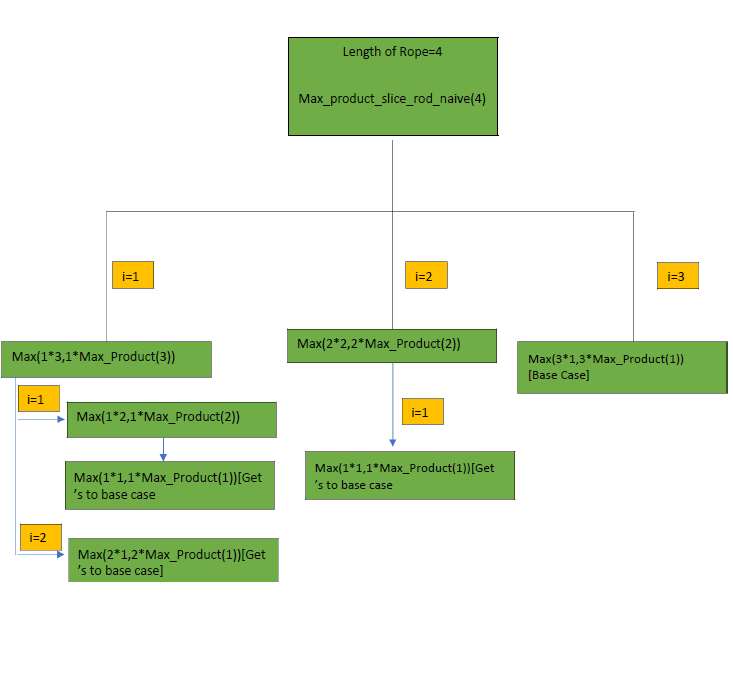

In [1]:
def Max_product_slice_rod_naive(n):
     
    # Base cases
    if (n == 0 or n == 1):
        return 0
  
    ### For cases greater than 1
    Max_Product = 0
    for i in range(1, n):
        
        
        Max_Product = max(Max_Product, max(i * (n - i),Max_product_slice_rod_naive(n - i) * i))
  
    #Return the maximum of all values
    return Max_Product

### AQ2.2 Show that the algorithm has exponential running time.

<div class="alert alert-block alert-info">
<b>Pseudo Code for Naive Implementation of the Algorithm: 
   
 
##### Max_product_slice_rod_naive(n):
        1. if n<=1       (Handle Base case: I cannot Slice the rod according the given constraints.)
        2.      return 0
        3. maximum_product = - ∞
        4. for i=1 to n  ( Other Case)
        5.           maximum_product=max(maximum_product,max(i*n-i, Max_slice_product_rod_naive(n-i)*i)
        6.      return maximum_product
</div>      
 



>#### I am gonna use this psuedo code for calculation the the Running time complexity.
>#### I assume the running time complexity when the input is of rope of length n is T(n)
>#### Now I want to write T(n) in terms of T(n-1) where n-1 is the lenght of the string.

>>#### T(n)=x + T(n-1)
>>#### To estimate x, I see the for loop and the iteration that i'm doing extra is i=n-1. For this iteration I just call Max_slice_product_rod_naive(1) only. Hence x=1 (one extra computation.
>>#### T(n)=1 + T(n-1)




>#### Now I want to write T(n) in terms of T(n-2) where n-2 is the lenght of the string.
>>#### T(n)=1 + x + T(n-2).
>>#### To estimate x, I see the for loop and the iteration that i'm doing extra is i=n-2. For this iteration I just call Max_slice_product_rod_naive(2) only. 
>>#### In recursive call of Max_slice_product_rod_naive(2), the for loop would have only one iteration Max_slice_product_rod_naive(1). 
>>#### Hence, I do total do total of two computations. Therefore x=2.
>>#### T(n)=1 + 2 + T(n-2)

>#### Now I want to write T(n) in terms of T(n-3) where n-3 is the lenght of the string.
>>#### T(n)=1 + 2 + x + T(n-3).
>>#### To estimate x, I see the for loop and the iteration that i'm doing extra is i=n-3. For this iteration I just call Max_slice_product_rod_naive(3) only. 
>>#### In recursive call of Max_slice_product_rod_naive(3), the for loop would have:
>>>####  1. Max_slice_product_rod_naive(2). From previous step I know it takes 2 recursive calls. The 
>>>####  2. Max_slice_product_rod_naive(1). This is only one recursive call.
>>#### Hence, I do total do total of 4 recursive calls 
>>>#### Max_slice_product_rod_naive(3): 1
>>>#### Max_slice_product_rod_naive(2): 1
>>>#### Max_slice_product_rod_naive(1): 2.
>>>#### (Note: the number represents number of recursive calls).


>>#### Therefore x=4 and T(n)=1 + 2 + 4 + T(n-3).

>#### Now I want to write T(n) in terms of T(n-4) where n-4 is the lenght of the string.
>>#### T(n)=1 + 2 + 4 + x + T(n-4).
>>#### To estimate x, I see the for loop and the iteration that i'm doing extra is i=n-4. For this iteration I just call Max_slice_product_rod_naive(3=4) only. 
>>#### In recursive call of Max_slice_product_rod_naive(4), the for loop would have:
>>>####  1. Max_slice_product_rod_naive(3). From previous step I know it takes 3 recursive calls.
>>>####  2. Max_slice_product_rod_naive(2). From previous step I know it takes 2 recursive calls.
>>>####  3. Max_slice_product_rod_naive(1). This is only takes 1 recursive call.
>>#### Hence, I do total do total of 8 recursive calls:
>>>#### Max_slice_product_rod_naive(4): 1
>>>#### Max_slice_product_rod_naive(3): 1
>>>#### Max_slice_product_rod_naive(2): 2
>>>#### Max_slice_product_rod_naive(1): 4 

>>#### Therefore x=8 and T(n)=1 + 2 + 4 + 8 + T(n-4).
>#### .
>#### .
>#### .
>#### .
>#### .
>#### .
>#### Based on the observation from previous steps,I can see that that T(n) can be written as T(n)= $ \sum_{i=n-k}^{n-1} 2^{n-i-1}.$ +T(n-k)
>#### Therefore T(n)= $ \sum_{i=1}^{n-1} 2^{n-i-1}.$ +T(1) and assuming T(1) takes constant time(c)

>#### Finally, I can write T(n)= $2^{n-1}-1$ + c.The running time of the Naive Recursion Algorithm is dominationed by $2^{n-1}$.
>#### The running time complexity in terms of  Big-O notations is given by $O(2^{n})$ 





 






### AQ2.3 Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.


- In previous implemented algorithm the disadvantage of the method(see the example case for reference) we calculate the same terms consecutively and hence the goal would be to reduce the computations of the terms to just once which are repeatedly being used. 

- For this goal, we leverage the idea of the the Dynamic Programming.
    
<div class="alert alert-block alert-warning">
<b> Idea of the Dynamic Programming way of Implementation of the algorithm:
    
    
    1. Given a length of rope given as a n, I adopt a bottom-up approach to calculate the Maximum Product for the respective possible substrings combinations.

    2. I Iterate over the length of the rope from i=1 to n and then the idea of the this loop is to get Maximum Product for a string of length=i
        
    3. I create a subloop in which I iterate over the possible values of cuts of string size=i from values j=1 to i-1 to get the maximum product of string of size=i
    
    4. The important things is to note that I already know the maximum product of substrings formed in the second loop from the previous iterations for i=[1,.. i-1]
        
        4.1 Elaborating over the point 4. Suppose I store the the values of Maximum product in a variable var. 
    
        4.2 So for the iteration i, I already know the Maximum product from var[1] to var[i-1]( the index of the variable denotes the length of the string)
        
        4.3 By storing the previous Maximum Product I remove the disadvantage of the Naive-Recursive algorithm of repeated Calculations.
    
    5. Further for the logic implemented in the second loop,I state that:
    
        5.1 It will not be always the case that splitting the leftover subparts give me the maximum product. Further, I want to state that it might be case that[i*i-j] will give me a maximum product instead of spiliting the remaining substring of length i-j (var[i-j]*j) 
    
        5.2 Hence a take a Maximimum of [i*i-j] and [i*Max_product_after_splitting].(Max_product_after_splitting=var[i-j])
    
        
    
    
</div>  
    
    
<div class="alert alert-block alert-info">
<b>Pseudo Code for Naive Implementation of the Algorithm: 
   
 
##### Max_product_slice_rod_dynamic(n):
        1. if n<=1       (Handle Base case: I cannot Slice the rod according the given constraints.)
        2.      return 0
        3. var=[0,......0] has length of n. Assuming my starting index is 1.
        4. for i=1 to n  ( Other Case)
        5.    maximum_product = - ∞
        6.      for j= 1 to i-1
        7.           maximum_product=max(maximum_product,max(j*(i-j), var[i-j]*j)
        8.      var[i]= maximum_product
        9. return var[n]
</div>        
    

In [21]:

def Max_product_slice_rod_dynamic(n):
     
    # Base cases
    if (n == 0 or n == 1):
        return 0
    var=[0]*(n+1) ### Since index starts from 0,I create a variable of length of n+1 where index 1 to n represents the maximum product of string from length 1 to n.
    ### For cases greater than 1
   
    
    for i in range(1, n+1):
        #t=n-i
        Max_Product = 0
        for j in range(1,i):
           
                Max_Product = max(Max_Product, max(j * (i-j),var[i-j] *j))
        var[i]=Max_Product

  
    #Return the maximum of all values
    return var[n]

### Running time complexity for Dynamic Programming Algorithm:

#### *Approach*-

##### Assumptions: 
>##### Apart from for loops in the function I say that all the other operation are constant time with time complexity as c1. 
>##### The complexity for the loops I assume the running-time complexity is T(n)

##### 1. Suppose the time complexity for the an string of length of size n. Therefore I can write O(n)=T(n)+c

##### 2. Now if I write T(n) in terms of T(n-1). I get that O(n)=n+T(n-1)+2*c
>#####    I say for the nth iteration, due to the second subloop I perform n more steps compared to T(n-1) [ represents loops complexity, when the main loop goes from 1 to n-1]

##### 3. Going Further down I can write:
>#####   T(n)=n+ n-1 + T(n-2) + 3*c
>#####   T(n)=n+ n-1 + n-2 +T(n-3) + 4c
>#####   .
>#####   .
>#####   .
>#####   .
>#####   T(n)=n + n-1 + n-2 + n-3 + n-4 + n-5 + ...... 1 + n*c=n(n+1)/2 +n*c

##### 4. Hence overall the running-time complexity is of order O(n^2)




In [ ]:
Max_product_slice_rod_dynamic(50)

#### AQ 2.4 Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

#### *Approach*:

##### - The approach for this problem is quite straightforward. I use the previously implemented two functions for recursion and dynamic programming algorithms.
##### - Then I plot a 3 line plots: One for each and one combined plot(to appreciate the running time scale difference).



100%|██████████| 24/24 [00:15<00:00,  1.50it/s] 


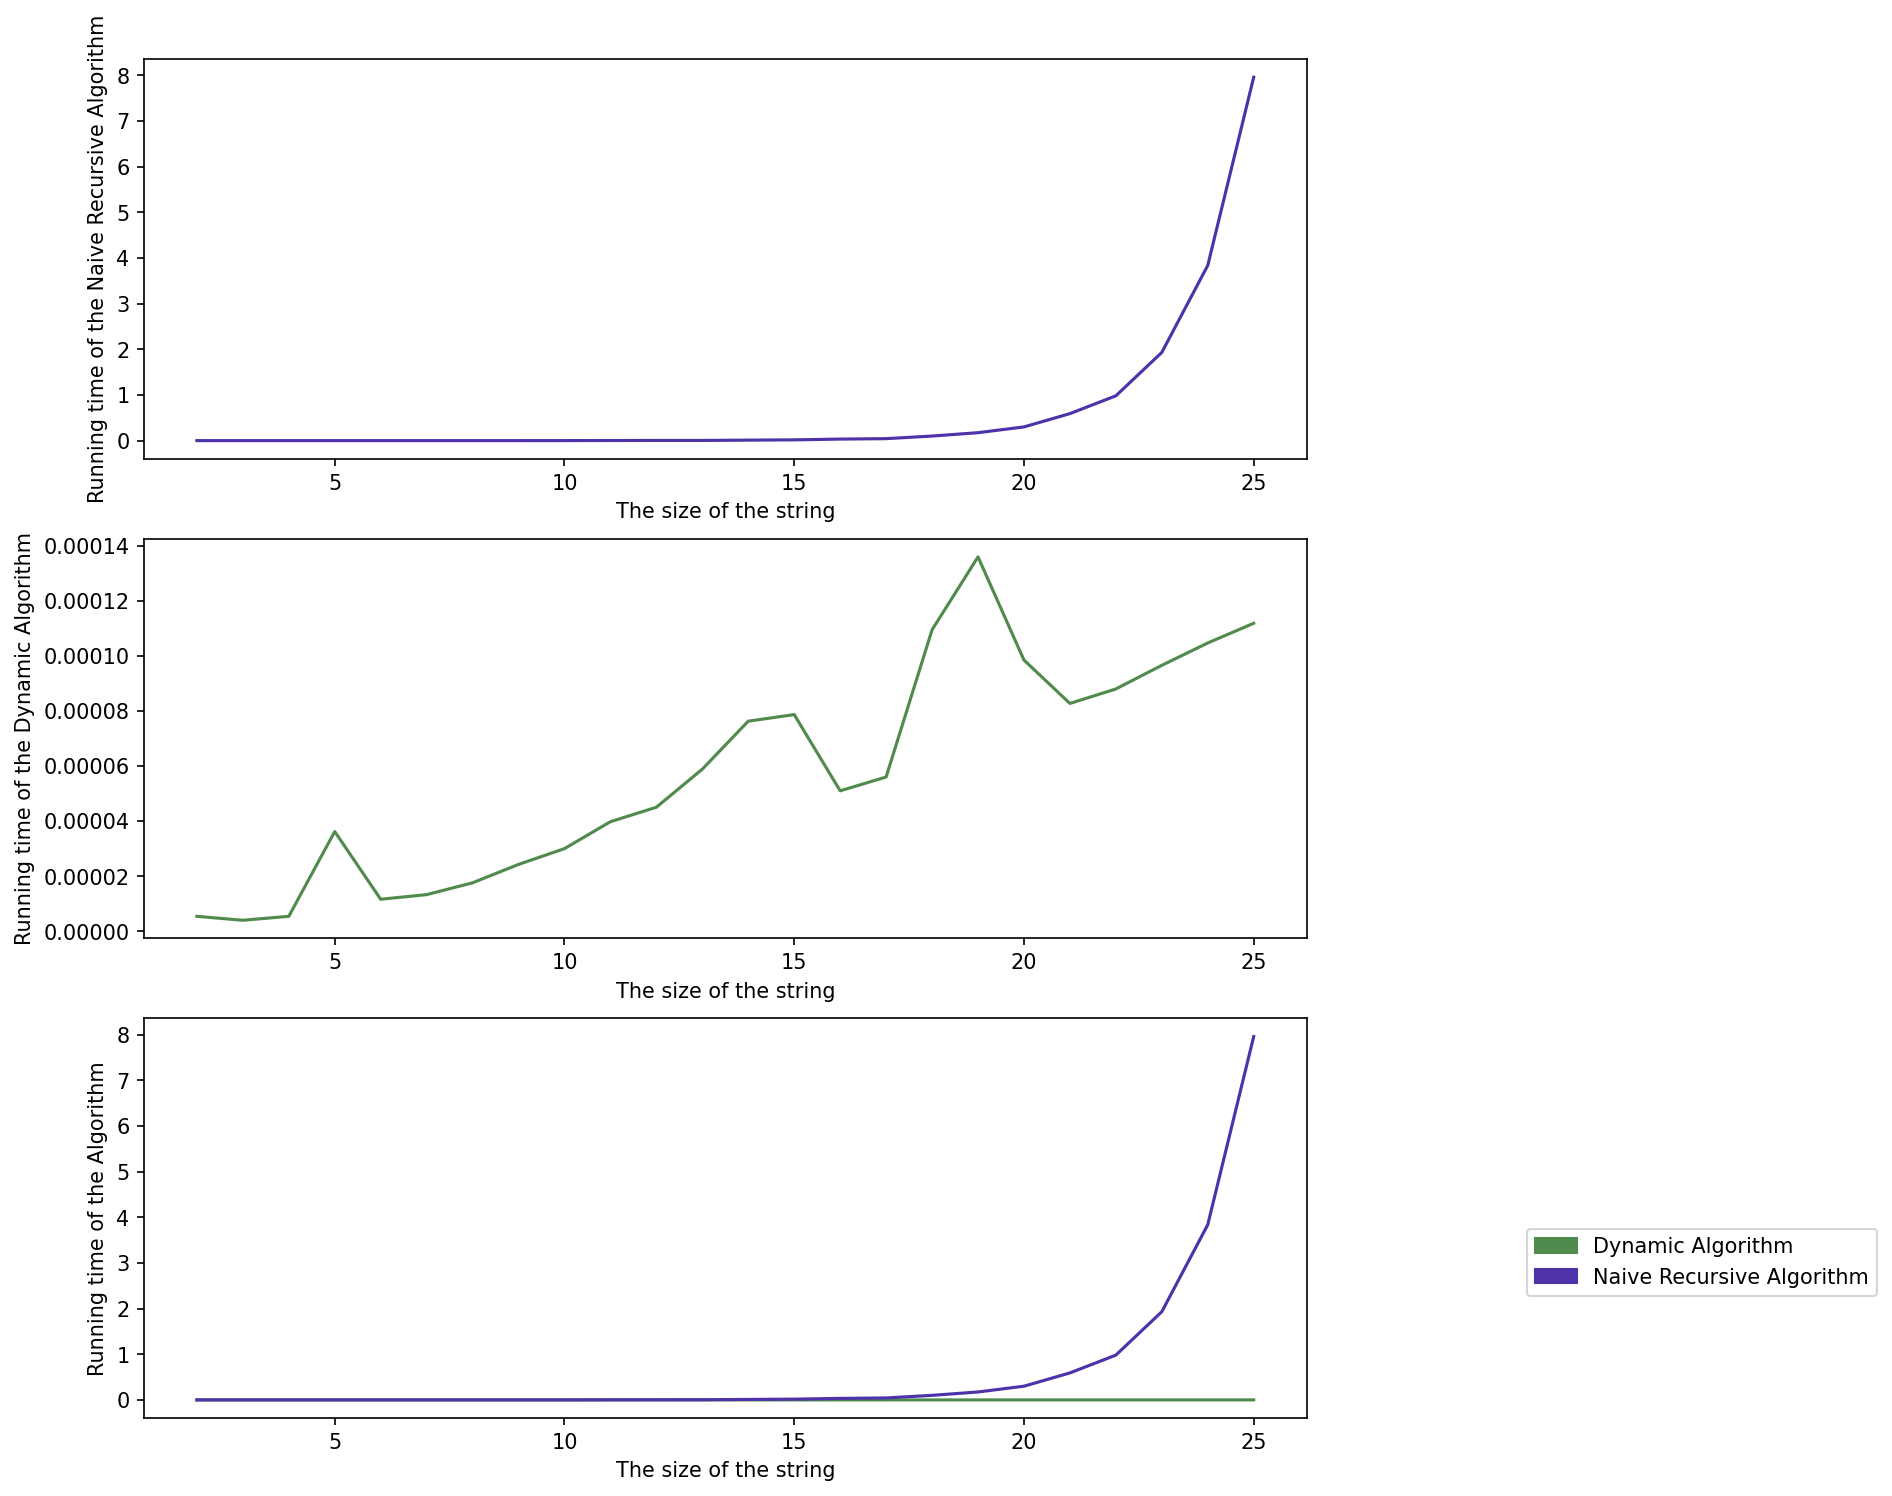

In [30]:

time1=[] ### Recursive_Exponential
time2=[] ## Dynamic_Polynomial

for i in tq(range(2,26)):
    start_time=time.time()
    Max_product_slice_rod_naive(i)
    delta=time.time()-start_time    ### Recursion Exponential
    time1.append(delta)
    
    start_time=time.time()
    Max_product_slice_rod_dynamic(i)
    delta=time.time()-start_time    ### Dynamic Polynomial
    time2.append(delta)
    
colors=[]
for i in range(2):
        colors.append( (random.random(), random.random(), random.random()))
        
plt.figure(figsize=(10, 12), dpi=150)
plt.subplot(3,1,1)
plt.plot(range(2,26),time1,color=colors[1])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Naive Recursive Algorithm')

plt.subplot(3,1,2)  
plt.plot(range(2,26),time2,color=colors[0])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Dynamic Algorithm')

plt.subplot(3,1,3)  

plt.plot(range(2,26),time2,color=colors[0])
plt.plot(range(2,26),time1,color=colors[1])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Algorithm')
labels=['Dynamic Algorithm','Naive Recursive Algorithm']
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i,label in enumerate(labels)]
plt.legend(handles,labels,bbox_to_anchor=(1,-0.5,0.5,1))



#### Comments: 

#### 1. The dynamic programming performs way better than it's counter-part Naive Recursive algorithm and the time scale differs to the power of 10^5 between the two.
#### 2. This is mainly due to the reason that Dynamic Programming Algortihm avoids the repeated calculation of the terms being reused.

### AQ2.5 Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

1. The idea to implement a more optimal algorithm than dynamic programming which gives us a Polynomial Solution starts with a very simple and basic approach.

     - Before approaching towards the idea and implementation of the algorithm I would like to take your attention towards some basic mathematics:
        
    - I'm taking a list of natural number like: 2,3,4,5,6,7,8.Now suppose I want to break this number into small numbers such that sum of the smalll numbers should be equal to the original number and the produt is maximum.
            
        - 2 : 2
            
            
        - 3 : 3
            
            
         - 4 : 2 * 2
            
            
         - 5 : 3 * 2
          
            
         - 6 : 3 * 3
            
            
         - 7 : 3 * 2 * 2
            
           
         - 8 : 3 * 3 * 2
            
           
         - 9 : 3 * 3 * 3
            
           
        - 10 : 3 * 3 * 2 * 2
           
        
     - Do you notice something ?
        
        
     - From this I draw a conclusion is that for numbers greater than 4, I can break the number into smallers numbers composing of 2's and 3's whose sum is equal to the bigger number and the product is maximum for all the ranges of possible combination of smaller numbers. Let me give you a counter example which might help to make my claim stronger.Let's take the number 10.
        
        
     - I can break 10 as : 5 * 5. Don't you think if I break the 5 as : 2 * 3 I will get a bigger multiplication. Hence I break the number 5 * 5 as: 2 * 3 * 2 * 3. Voila, I hope this makes more sense to you.
        
    
<div class="alert alert-block alert-warning">
<b> Idea of the Optimal Recursive Algorithm:
    
     1. So using the idea mentioned in the point 1. I would like to take the conclusion further and implement a algorithm for the Cutting Rope Problem.
    
     2. Now if you closely see the way the list of natural number are broken into mulitple 2's and 3's you could see a pattern of finding the best set of numbers to maximise the  product of numbers such that the sum of numbers is equal to the original number.I propose:
        
        2.1 Suppose I know the set of numbers which maximise the product for Cutting_Ropes(N-1). N is the length of the number.
    
        2.2 TO find the next set of numbers which maximise the product for Cutting_ropes is equal to replacing by: minimum ( Set of numbers for Cutting_Ropes(N-1)) + 1.Until this number is less than 4.
    
        2.3 When the number is equal to 4 I can break this into : 2 * 2. This value is same as 4 but I suppose if I continue the logic given in 2.2 and the next number would be 5 according to the logic but as previously shown I can get a greater multiplication value by breaking into 2 * 3.
    
        2.4 Hence the logic and constraint in 2.2 seems logical.
    
     3. In this way I find the set of number which maximises the product using recursion. This is different than our naive algorithm implementation,in the way the tree of possible computations does not diverge and every node as a single child node.
    
    
</div>  
    
<div class="alert alert-block alert-info">
<b>Pseudo Code for Optimal Recursive Algorithm: 
   
 
##### Cutting_Ropes(n):
        1. if n <= 1       (Handle Base case: I cannot Slice the rod according the given constraints.)
        2.      return The length of the string has to be greater than 2
        3. if n == 2       (Handle Base case)
        4.      return [2]
        5. if n == 3       (Handle Base case)
        6.      return [3]
        7. if n > 3
        8.        previous_set_numbers=Cutting_Ropes(n-1)
        9.        min_element=min(previous_set_numbers) + 1
        10.        previous_set_numbers.remove(min_element)
        11.        if min_element < 4
        12.             next_set=previous_set_numbers.add(min_element)
        13.             retrun next_set
        14.       else:
        15.             next_set=previous_set_number.add(2,2)
        16.             return next_set  
                   
</div> 


<div class="alert alert-block alert-success">
<b>Example Case of the Algorithm :
</div>

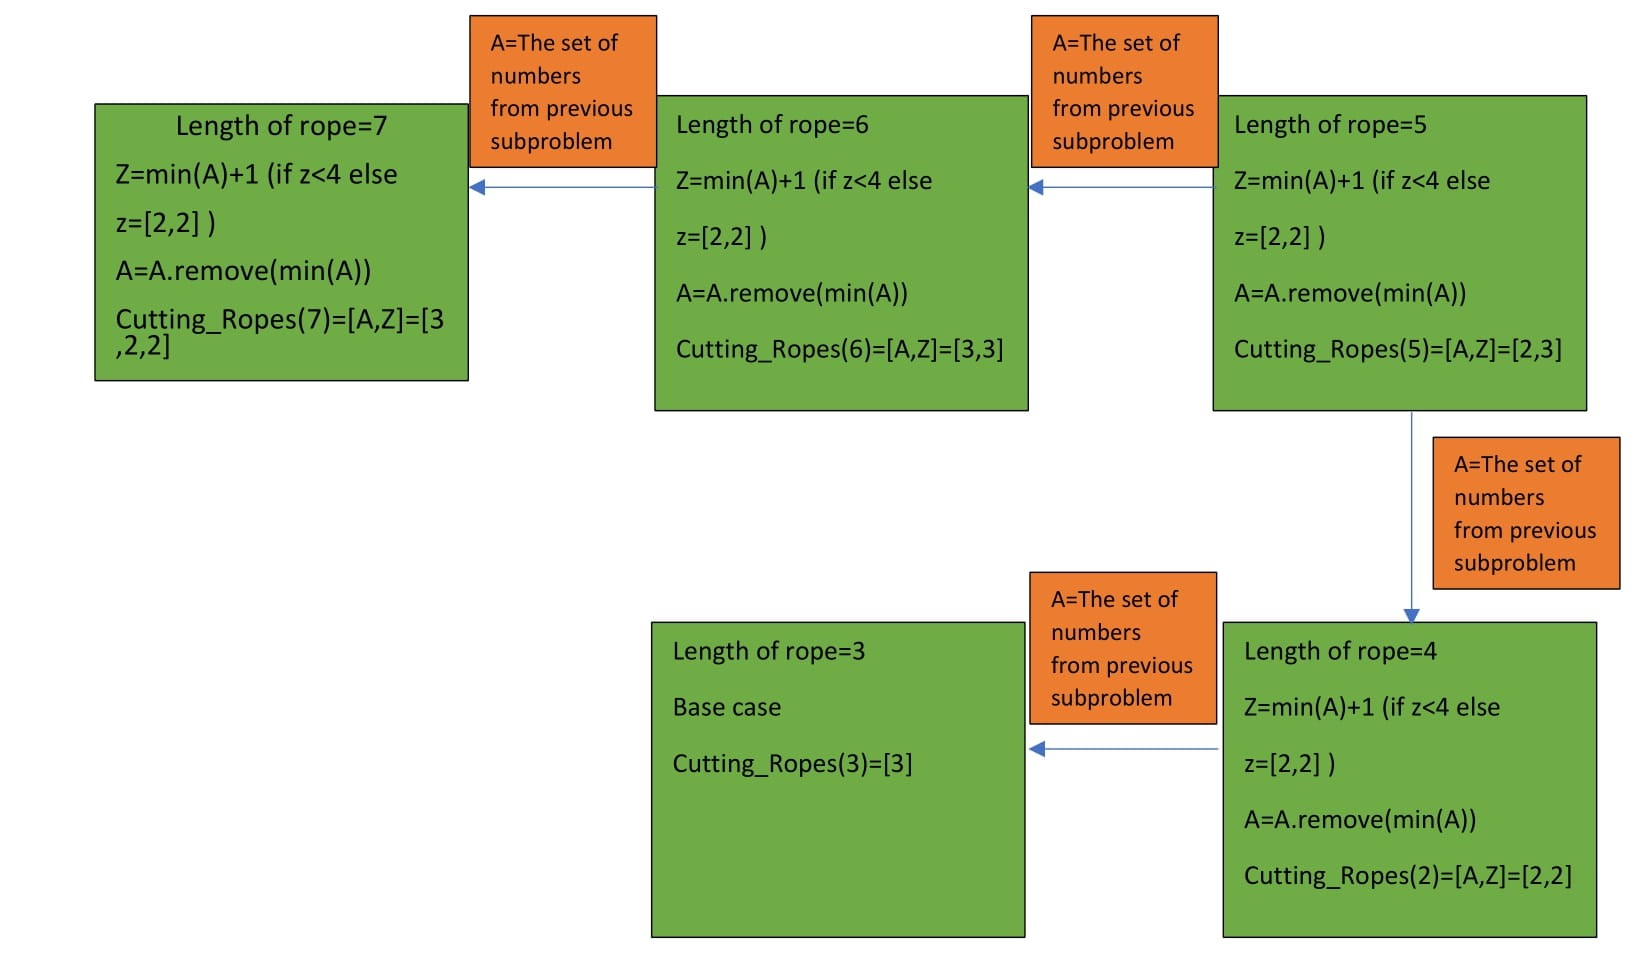

In [1]:
def cutting_ropes(n):
    if n<=1:
        return [1]
    if n==2:
        x=[2]
        
        return x
    if n==3:
        x=[3]
        
        return x
    
    if n>3:
        previous_elements=cutting_ropes(n-1)
        
        z=min(previous_elements)+1
        previous_elements.remove(min(previous_elements))
        if z<4:

            previous_elements.append(z)
            return previous_elements
        else:
            previous_elements.append(2)
            previous_elements.append(2)
            return previous_elements
        

In [2]:
def ropes_multi(x:list):
    w=1
    if (len(x)==1) and ((x[0]==1) or (x[0]==2) or (x[0]==3) ):
        return print('The length of the string has to be greater than 3 to be able to divide to follow the constrains given')
    else:
        for i in x:
            w=w*i
    return w

In [11]:
ropes_multi(cutting_ropes(50))

86093442

100%|██████████| 38/38 [00:00<00:00, 4267.64it/s]

The length of the string has to be greater than 3 to be able to divide to follow the constrains given
The length of the string has to be greater than 3 to be able to divide to follow the constrains given


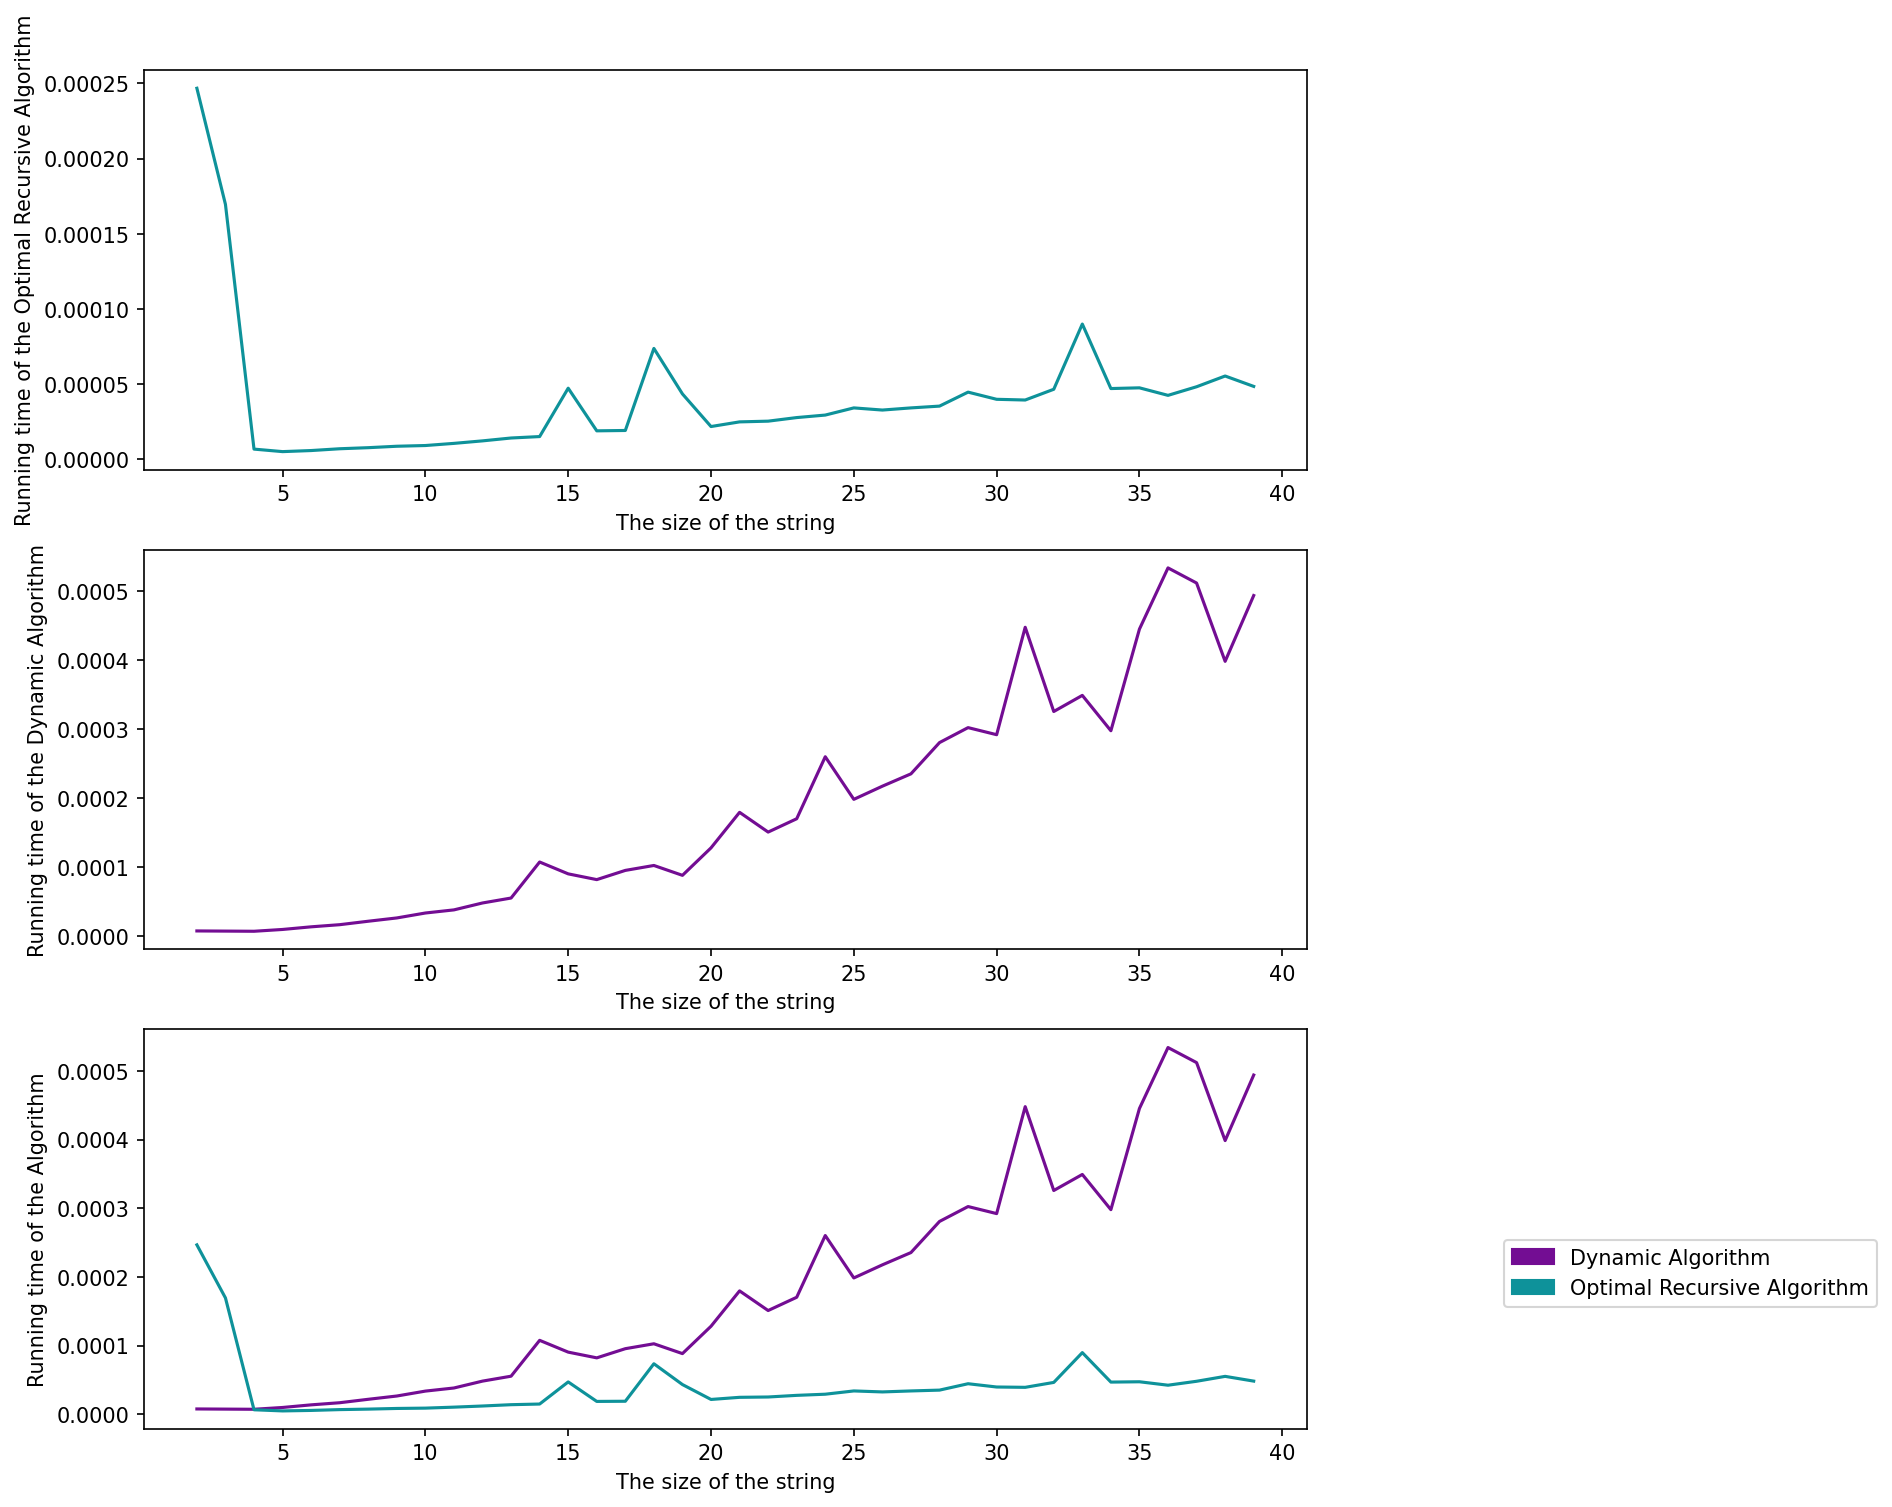

In [27]:

time1=[] ### Recursive_Exponential
time2=[] ## Dynamic_Polynomial

for i in tq(range(2,40)):
    start_time=time.time()
    ropes_multi(cutting_ropes(i))
    delta=time.time()-start_time    ### Recursion Exponential
    time1.append(delta)
    
    start_time=time.time()
    Max_product_slice_rod_dynamic(i)
    delta=time.time()-start_time    ### Dynamic Polynomial
    time2.append(delta)
    
colors=[]
for i in range(2):
        colors.append( (random.random(), random.random(), random.random()))
        
plt.figure(figsize=(10, 12), dpi=150)
plt.subplot(3,1,1)
plt.plot(range(2,40),time1,color=colors[1])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Optimal Recursive Algorithm')

plt.subplot(3,1,2)  
plt.plot(range(2,40),time2,color=colors[0])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Dynamic Algorithm')

plt.subplot(3,1,3)  

plt.plot(range(2,40),time2,color=colors[0])
plt.plot(range(2,40),time1,color=colors[1])
plt.xlabel('The size of the string')
plt.ylabel('Running time of the Algorithm')
labels=['Dynamic Algorithm','Optimal Recursive Algorithm']
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i,label in enumerate(labels)]
plt.legend(handles,labels,bbox_to_anchor=(1,-0.5,0.5,1))



### Comments: 

#### We can see that Optimal Recursive Algorithm works way better than Dynammic Programming method for large values of n

#### The running time complexity of the Optimal Recursive Algorithm is almost constant time.




